In [1]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.signal import find_peaks
import math

In [2]:
# Loading the dataset
data = pd.read_csv('Bike-Sharing-Dataset/hour.csv')
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
# considering train data
train_data = data.loc[pd.DatetimeIndex(data['dteday']).day < 20]
train_data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [4]:
# considering test data
test_data = data.loc[pd.DatetimeIndex(data['dteday']).day > 19]
test_data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
431      432  2011-01-20       1   0     1   0        0        4           1   
432      433  2011-01-20       1   0     1   1        0        4           1   
433      434  2011-01-20       1   0     1   2        0        4           1   
434      435  2011-01-20       1   0     1   3        0        4           1   
435      436  2011-01-20       1   0     1   4        0        4           1   

     weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
431           1  0.26  0.2273  0.56     0.3881       5           8   13  
432           1  0.26  0.2727  0.56     0.0000       2           3    5  
433           1  0.26  0.2727  0.56     0.0000       0           2    2  
434           1  0.26  0.2576  0.56     0.1642       0           1    1  
435           1  0.26  0.2576  0.56     0.1642       0           1    1

In [5]:
# dropping unnecessary features from train_set
train_data = train_data.drop(columns = ['instant','dteday','casual','registered'])
train_data.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  
0  0.2879  0.81        0.0   16  
1  0.2727  0.80        0.0   40  
2  0.2727  0.80        0.0   32  
3  0.2879  0.75        0.0   13  
4  0.2879  0.75        0.0    1

In [6]:
# dropping unnecessary features from test_set
test_data = test_data.drop(columns = ['instant','dteday','casual','registered'])
test_data.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
431       1   0     1   0        0        4           1           1  0.26   
432       1   0     1   1        0        4           1           1  0.26   
433       1   0     1   2        0        4           1           1  0.26   
434       1   0     1   3        0        4           1           1  0.26   
435       1   0     1   4        0        4           1           1  0.26   

      atemp   hum  windspeed  cnt  
431  0.2273  0.56     0.3881   13  
432  0.2727  0.56     0.0000    5  
433  0.2727  0.56     0.0000    2  
434  0.2576  0.56     0.1642    1  
435  0.2576  0.56     0.1642    1

In [7]:
#corelation matrix
corr = train_data.corr()
corr

season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.004797  0.971524 -0.006546  0.029368 -0.009691   
yr         -0.004797  1.000000 -0.004932 -0.004234  0.012021 -0.018162   
mnth        0.971524 -0.004932  1.000000 -0.006818  0.001731 -0.001012   
hr         -0.006546 -0.004234 -0.006818  1.000000 -0.000354 -0.001660   
holiday     0.029368  0.012021  0.001731 -0.000354  1.000000 -0.104800   
weekday    -0.009691 -0.018162 -0.001012 -0.001660 -0.104800  1.000000   
workingday -0.008126 -0.002482 -0.003394  0.002780 -0.250491  0.035554   
weathersit  0.008879 -0.012548  0.012144 -0.022740 -0.007074 -0.016439   
temp        0.258689  0.061226  0.257589  0.145430  0.000295 -0.026143   
atemp       0.264744  0.058540  0.264173  0.140343 -0.005215 -0.035079   
hum         0.190610 -0.078606  0.204537 -0.278011  0.001929 -0.059722   
windspeed  -0.147121 -0.015221 -0.150192  0.146631  0.008409 -0.006178   
cnt         0.163439  0.260403  0.166862  0.400601 -0.005393  0.027690   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season       -0.008126    0.008879  0.258689  0.264744  0.190610  -0.147121   
yr           -0.002482   -0.012548  0.061226  0.058540 -0.078606  -0.015221   
mnth         -0.003394    0.012144  0.257589  0.264173  0.204537  -0.150192   
hr            0.002780   -0.022740  0.145430  0.140343 -0.278011   0.146631   
holiday      -0.250491   -0.007074  0.000295 -0.005215  0.001929   0.008409   
weekday       0.035554   -0.016439 -0.026143 -0.035079 -0.059722  -0.006178   
workingday    1.000000    0.033772  0.029966  0.024660 -0.010880   0.013373   
weathersit    0.033772    1.000000 -0.055035 -0.055376  0.406244   0.007261   
temp          0.029966   -0.055035  1.000000  0.984948 -0.064949  -0.017852   
atemp         0.024660   -0.055376  0.984948  1.000000 -0.043536  -0.057473   
hum          -0.010880    0.406244 -0.064949 -0.043536  1.000000  -0.318607   
windspeed     0.013373    0.007261 -0.017852 -0.057473 -0.318607   1.000000   
cnt           0.011594   -0.128655  0.394454  0.389784 -0.317371   0.101369   

                 cnt  
season      0.163439  
yr          0.260403  
mnth        0.166862  
hr          0.400601  
holiday    -0.005393  
weekday     0.027690  
workingday  0.011594  
weathersit -0.128655  
temp        0.394454  
atemp       0.389784  
hum        -0.317371  
windspeed   0.101369  
cnt         1.000000

In [8]:
# dropping highly correlated features from train data
# 'season' is highly correlated with month
# 'atemp' is highly correlated with temp
train_data = train_data.drop(columns = ['season','atemp'])
train_data.head()

yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0   0     1   0        0        6           0           1  0.24  0.81   
1   0     1   1        0        6           0           1  0.22  0.80   
2   0     1   2        0        6           0           1  0.22  0.80   
3   0     1   3        0        6           0           1  0.24  0.75   
4   0     1   4        0        6           0           1  0.24  0.75   

   windspeed  cnt  
0        0.0   16  
1        0.0   40  
2        0.0   32  
3        0.0   13  
4        0.0    1

In [9]:
# dropping highly correlated features from test data
test_data = test_data.drop(columns = ['season','atemp'])
test_data.head()

yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
431   0     1   0        0        4           1           1  0.26  0.56   
432   0     1   1        0        4           1           1  0.26  0.56   
433   0     1   2        0        4           1           1  0.26  0.56   
434   0     1   3        0        4           1           1  0.26  0.56   
435   0     1   4        0        4           1           1  0.26  0.56   

     windspeed  cnt  
431     0.3881   13  
432     0.0000    5  
433     0.0000    2  
434     0.1642    1  
435     0.1642    1

In [10]:
# seperating weather as per values for enhancing features
# seperation in train set
weather=pd.get_dummies(train_data['weathersit'],prefix='weather')
train_data=pd.concat([train_data,weather],axis=1)
train_data.head()

yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0   0     1   0        0        6           0           1  0.24  0.81   
1   0     1   1        0        6           0           1  0.22  0.80   
2   0     1   2        0        6           0           1  0.22  0.80   
3   0     1   3        0        6           0           1  0.24  0.75   
4   0     1   4        0        6           0           1  0.24  0.75   

   windspeed  cnt  weather_1  weather_2  weather_3  weather_4  
0        0.0   16          1          0          0          0  
1        0.0   40          1          0          0          0  
2        0.0   32          1          0          0          0  
3        0.0   13          1          0          0          0  
4        0.0    1          1          0          0          0

In [11]:
# seperation in test set
weather=pd.get_dummies(test_data['weathersit'],prefix='weather')
test_data=pd.concat([test_data,weather],axis=1)
test_data.head()

yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
431   0     1   0        0        4           1           1  0.26  0.56   
432   0     1   1        0        4           1           1  0.26  0.56   
433   0     1   2        0        4           1           1  0.26  0.56   
434   0     1   3        0        4           1           1  0.26  0.56   
435   0     1   4        0        4           1           1  0.26  0.56   

     windspeed  cnt  weather_1  weather_2  weather_3  weather_4  
431     0.3881   13          1          0          0          0  
432     0.0000    5          1          0          0          0  
433     0.0000    2          1          0          0          0  
434     0.1642    1          1          0          0          0  
435     0.1642    1          1          0          0          0

In [12]:
# dropping the unnecessary column as the features are seperated
train_data = train_data.drop(columns = ['weathersit'])
train_data.head()
test_data = test_data.drop(columns = ['weathersit'])
test_data.head()

yr  mnth  hr  holiday  weekday  workingday  temp   hum  windspeed  cnt  \
431   0     1   0        0        4           1  0.26  0.56     0.3881   13   
432   0     1   1        0        4           1  0.26  0.56     0.0000    5   
433   0     1   2        0        4           1  0.26  0.56     0.0000    2   
434   0     1   3        0        4           1  0.26  0.56     0.1642    1   
435   0     1   4        0        4           1  0.26  0.56     0.1642    1   

     weather_1  weather_2  weather_3  weather_4  
431          1          0          0          0  
432          1          0          0          0  
433          1          0          0          0  
434          1          0          0          0  
435          1          0          0          0

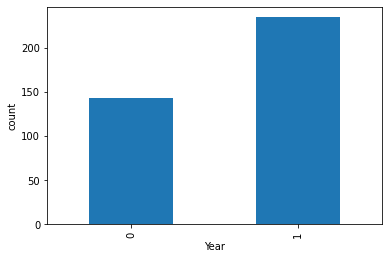

In [13]:
# variation of count with year
data.groupby('yr')['cnt'].mean().plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('count')
plt.savefig('year.png')

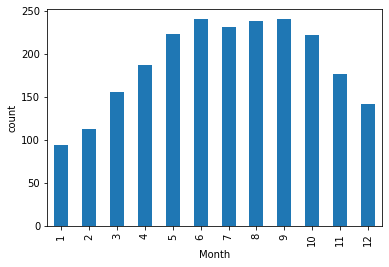

In [14]:
# variation of count with month
data.groupby('mnth')['cnt'].mean().plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('count')
plt.savefig('month.png')

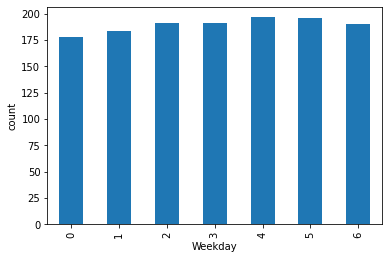

In [15]:
# variation of count with weeekday
data.groupby('weekday')['cnt'].mean().plot(kind = 'bar')
plt.xlabel('Weekday')
plt.ylabel('count')
plt.savefig('weekday.png')

In [16]:
# variation of count with hour
data.groupby('hr')['cnt'].mean().plot(kind = 'bar')
plt.xlabel('Hour')
plt.ylabel('count')
plt.savefig('hour.png')

In [17]:
# variation of count with temperature
# as there is a large values taken by temperature
# convert the 'temp' variable into intervals or so called bins 
# and then treat it like a discrete variable
# the given temp is normalised by dividing with 41 - referred readme in the provided link
# so let us consider bins with size 5 that of original
# temp_bins = (temp*41)/5
temp_data = train_data.copy()
temp_data['temp_bins'] = np.floor(temp_data['temp']*41//5)
temp_data.groupby('temp_bins')['cnt'].mean().plot(kind = 'bar')
plt.xlabel('temperature')
plt.ylabel('count')
plt.savefig('temp.png')

In [18]:
# variation of count with humidity
# as there is a large values taken by humidity
# convert the 'hum' variable into intervals or so called bins 
# and then treat it like a discrete variable
# the given temp is normalised by dividing with 100 - referred readme in the provided link
# so let us consider bins with size 5 that of original
# temp_bins = (temp*100)/5

temp_data = train_data.copy()
temp_data['hum_bins'] = np.floor(temp_data['hum']*100//5)
temp_data.groupby('hum_bins')['cnt'].mean().plot(kind = 'bar')
plt.xlabel('humidity')
plt.ylabel('count')
plt.savefig('hum.png')

In [19]:
# considering X for train data
# taking all columns except 'cnt'
X_train = train_data.loc[:, ~train_data.columns.isin(['cnt'])]
print(type(X_train))
X_train = X_train.to_numpy()
print(type(X_train))
X_train = np.c_[np.ones((len(X_train),1)),X_train]
X_train.shape

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


(10886, 14)

In [20]:
# considering Y for train data
# taking the 'cnt' column
Y_train = train_data.cnt
print(type(Y_train))
Y_train = Y_train.to_numpy()
print(type(Y_train))
Y_train.shape

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


(10886,)

In [21]:
# considering X for train data
# taking all columns except 'cnt'
X_test = test_data.loc[:, ~test_data.columns.isin(['cnt'])]
print(type(X_test))
X_test = X_test.to_numpy()
print(type(X_test))
X_test = np.c_[np.ones((len(X_test),1)),X_test]
X_test.shape

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


(6493, 14)

In [22]:
# considering Y for train data
# taking the 'cnt' column
Y_test = test_data.cnt
print(type(Y_test))
Y_test = Y_test.to_numpy()
print(type(Y_test))
Y_test.shape

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


(6493,)

In [23]:
# splitting into train and validation
# Shuffle your dataset 
shuffle_train = train_data.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(train_data))

# Split your dataset 
train_data = shuffle_train[:train_size]
valid_data = shuffle_train[train_size:]

In [24]:
# considering data values of train set
X_train = train_data.loc[:, ~train_data.columns.isin(['cnt'])]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones((len(X_train),1)),X_train]
Y_train = train_data.cnt

# considering data values of validation set
X_valid = valid_data.loc[:, ~valid_data.columns.isin(['cnt'])]
X_valid = X_valid.to_numpy()
X_valid = np.c_[np.ones((len(X_valid),1)),X_valid]
Y_valid = valid_data.cnt
X_train.shape

(8708, 14)

In [25]:
# prediction function for possion regression
def predict(X,w):
    return np.exp(np.matmul(X,w))

# RMSE function
def rmse(w,X,y):
    return np.sqrt(np.mean((predict(X,w)-y)**2))

# cost or loss function for poisson regression
def cal_cost(w,X,y,regularisation,lamda):
    m = len(y)
    predictions = predict(X,w)
    cost = -(np.mean(np.multiply(y,np.matmul(X,w)) - predictions)/2);
    if(regularisation == 1):
        cost += (lamda*np.sum(np.abs(w)))/2
    else :
        cost += (lamda*(np.sum(w**2)))/2
    return cost

In [26]:
# function for running gradient descent
def learn_weights(X,y,learning_rate,iterations,regularisation=0,lamda=0):
    m = len(y)
    w =  np.array([0.0 for _ in range(X.shape[1])])
    prev_min = np.inf
    cost_history = []
    for it in range(iterations):
        prediction = predict(X,w)
        grad = np.matmul(X.T,(prediction - y))
        if (regularisation == 0):
            w = w - (1/m)*learning_rate*(grad)
        elif (regularisation == 1):
            w = w - (1/m)*learning_rate*(grad+(lamda*np.sign(w))/2)
        else:
            w = w - (1/m)*learning_rate*(grad+(lamda*w))
        cost_history.append(cal_cost(w,X,y,regularisation,lamda))
#         if(prev_min > cost_history[it]):
#             w_final = w.copy()
#             prev_min = cost_history[it]
    return w, cost_history

In [27]:
# function for selecting best hyperparamer
# lamda in range from range1 to range2
def estimate_lamda(X,y,learning_rate,iterations,lamda):
    min_cost1 = np.inf
    min_cost2 = np.inf
    cost1 = []
    cost2 = []
    for it in lamda:
        # L1 Regularisation estimate
        w1, ch1 = learn_weights(X,y,learning_rate,iterations,1,it)
        cost1.append(cal_cost(w1,X,y,1,it))
        if(min_cost1 > cost1[-1]):
            min_cost1 = cost1[-1]
            w_final1 = w1
            lam1 = it
        # L2 Regularisation estimate
        w2, ch2 = learn_weights(X,y,learning_rate,iterations,2,it)
        cost2.append(cal_cost(w2,X,y,2,it))
        if(min_cost2 > cost2[-1]):
            min_cost2 = cost2[-1]
            w_final2 = w2
            lam2 = it
    return lam1, lam2, cost1, cost2

In [28]:
# Estimating best hyperparameter 
# for L1 & L2 regularisation  
# in the range [range1, range2]
# using validation data

# setting parameters
rate = 0.000034
itrs = 100
lamda1 = np.array([0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
lamda2 = np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
lamda3 = np.linspace(1,10,num=50)

# Calculating best lamda parameter
best_lamda1, best_lamda2, cost1, cost2 = estimate_lamda(X_valid,Y_valid,rate,itrs,lamda3)
print("Best Hyperparameter for L1 Regularisation is :",best_lamda1)
print("Best Hyperparameter for L2 Regularisation is :",best_lamda2)

Best Hyperparameter for L1 Regularisation is : 1.0
Best Hyperparameter for L2 Regularisation is : 1.0


In [29]:
# Working without Regularisation
# setting Parameters
rate = 0.000034
itrs = 5000

# Finding weight vector over train_set
w0, ch0 = learn_weights(X_train,Y_train,rate,itrs)
print("Weight vector with No Regularisation w0 = ", w0)

# plotting cost function vs number of iteration
plt.plot(ch0)
plt.xlabel("Number of iterations")
plt.ylabel("Loss or cost Function")
plt.title('No Regularisation')
plt.show()

# Finding RMSE for train_set
print("RMSE with No Regularisation for Train Set: ",rmse(w0,X_train,Y_train))

# Finding RMSE for test_set
print("RMSE with No Regularisation for Test Set: ",rmse(w0,X_test,Y_test))

Weight vector with No Regularisation w0 =  [1.88613736 0.51741035 0.05282316 0.05711194 0.12293459 0.03395725
 0.09309985 1.45614991 0.10143889 0.614636   0.89419389 0.81240696
 0.17761829 0.00191823]


RMSE with No Regularisation for Train Set:  150.02499620296712
RMSE with No Regularisation for Test Set:  153.13242826903922


In [30]:
# Working with L1 Regularisation
# setting Parameters
rate = 0.000034
itrs = 5000
lamda = best_lamda1

# Finding weight vector over train_set
w1, ch1 = learn_weights(X_train,Y_train,rate,itrs,1,lamda)
print("Weight vector with L1 Regularisation w1 = ", w1)

# plotting cost function vs number of iteration
plt.plot(ch1)
plt.xlabel("Number of iterations")
plt.ylabel("Loss or cost Function")
plt.title('L1 Regularisation')
plt.show()

# Finding RMSE for train_set
print("RMSE with L1 Regularisation for Train Set: ",rmse(w1,X_train,Y_train))

# Finding RMSE for test_set
print("RMSE with L1 Regularisation for Test Set: ",rmse(w1,X_test,Y_test))

Weight vector with L1 Regularisation w1 =  [1.88613943 0.51741028 0.0528235  0.0571121  0.12292838 0.03395744
 0.09309939 1.4561477  0.10143683 0.61462998 0.89419039 0.81240315
 0.17761353 0.00190847]


RMSE with L1 Regularisation for Train Set:  150.0250366266825
RMSE with L1 Regularisation for Test Set:  153.13248166915895


In [31]:
# Working with L2 Regularisation
# setting Parameters
rate = 0.000034
itrs = 5000
lamda = best_lamda2

# Finding weight vector over train_set
w2, ch2 = learn_weights(X_train,Y_train,rate,itrs,2,lamda)
print("Weight vector with L2 Regularisation w2 = ", w2)

# plotting cost function vs number of iteration
plt.plot(ch2)
plt.xlabel("Number of iterations")
plt.ylabel("Loss or cost Function")
plt.title('L2 Regularisation')
plt.show()

# Finding RMSE for train_set
print("RMSE with L2 Regularisation for Train Set: ",rmse(w2,X_train,Y_train))

# Finding RMSE for test_set
print("RMSE with L2 Regularisation for Test Set: ",rmse(w2,X_test,Y_test))

Weight vector with L2 Regularisation w2 =  [1.88612797 0.51741149 0.05282384 0.0571123  0.12293443 0.03395797
 0.09310235 1.456142   0.10144259 0.61463234 0.89419108 0.81240262
 0.17761606 0.00191821]


RMSE with L2 Regularisation for Train Set:  150.02517709048306
RMSE with L2 Regularisation for Test Set:  153.13266262746131
